## Setting up the FOLIUM

In [ ]:
from branca.colormap import LinearColormap
from shapely.wkt import loads
from shapely.geometry import Point, LineString, Polygon
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as pl
import os
import psycopg2
import sqlite3
import numpy as np


os.environ['SPATIALITE_SECURITY'] = 'relaxed'

#Sql Connection to gis.db
conn = sqlite3.connect('gis.db')
conn.enable_load_extension(True)
conn.load_extension('mod_spatialite')
conn.execute('''
SELECT ImportSHP('gadm36_PHL_shp/gadm36_PHL_2', 'gadm', 'utf-8', 4326)
''')

#Creating the map of iligan City
h = gpd.read_file('gadm36_PHL_shp/gadm36_PHL_2.shp')
ph['Province'] = ph['NAME_1']
ph['City'] = ph['NAME_2']
ph = ph[['Province','City','geometry']]
ph_LDN = ph[ph['Province'] == 'Lanao del Norte']
h_IC = ph[ph['City'] == 'Iligan City']
ph_IC

ax = ph_IC.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off');
conn.commit()

connection = psycopg2.connect(host='127.0.0.1', port=5432, dbname='cyvorgz', user='cyvorgz')
sql = "SELECT * FROM LINES"
ls = gpd.read_postgis(sql=sql, con=connection, geom_col='wkb_geometry', crs=4326)

#Geometry of map
ph_IC.loc[:, 'geometry'] = ph_IC['geometry'].simplify(0.001, preserve_topology=True)

ls['geometry'] = ls['wkb_geometry']
ic_streets = gpd.sjoin(ls,ph_IC, op='within',)

#Generate Random Density of Cars
ic_streets['car_density'] = np.random.randint(0,50,  ic_streets.shape[0])
ic_streets = ic_streets[['name','geometry','car_density']]

#Color of the Lines
colorscale = LinearColormap(['#33f284', '#000000'], vmin=ic_gdf['car_density'].min(), vmax=ic_gdf['car_density'].max())
colorscale

#Map Street Names and its colors
m = folium.Map(location=center, zoom_start=zoom, prefer_canvas=True)

def get_color(feature):
    val = feature['properties']['car_density']
    if not val:
        return '#000000'
    return colorscale(val)
    
folium.GeoJson(
    ic_gdf,
    name = 'Traffic Congestion',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name', 'car_density'],
        aliases=['Street Name',  'car_density']
    ),
    style_function = lambda feature: {
        'fillColor': get_color(feature),
        'color': get_color(feature),
        'weight': 2,

    }
).add_to(m)

m.save('test.html')

In [1]:
import geopandas as gpd
import folium
import pandas as pd

ImportError: No module named geopandas

In [2]:
center = [8.2427 ,124.2442] # latlng
zoom = 14

In [3]:
m = folium.Map(location=center, zoom_start=zoom, prefer_canvas=True)

In [4]:
m.save('test.html')

In [5]:
folium.LatLngPopup().add_to(m)

In [6]:
m.save('test.html')

## Setting up the SHAPEFILES and OSM

In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as pl
from shapely.geometry import Point
import os
import psycopg2
import sqlite3
from shapely.wkt import loads
from shapely.geometry import Point, LineString, Polygon
import os

os.environ['SPATIALITE_SECURITY'] = 'relaxed'

In [46]:
conn = sqlite3.connect('gis.db')
conn.enable_load_extension(True)
conn.load_extension('mod_spatialite')

In [47]:
conn.execute('''
SELECT ImportSHP('gadm36_PHL_shp/gadm36_PHL_2', 'gadm', 'utf-8', 4326)
''')

In [48]:
ph = gpd.read_file('gadm36_PHL_shp/gadm36_PHL_2.shp')

In [11]:
ph['Province'] = ph['NAME_1']
ph['City'] = ph['NAME_2']

In [12]:
ph = ph[['Province','City','geometry']]

In [13]:
ph_LDN = ph[ph['Province'] == 'Lanao del Norte']

In [14]:
ph_IC = ph[ph['City'] == 'Iligan City']

In [15]:
ph_IC

,Province,City,geometry
793,Lanao del Norte,Iligan City,"POLYGON ((124.49559784 8.13796997, 124.4871521..."


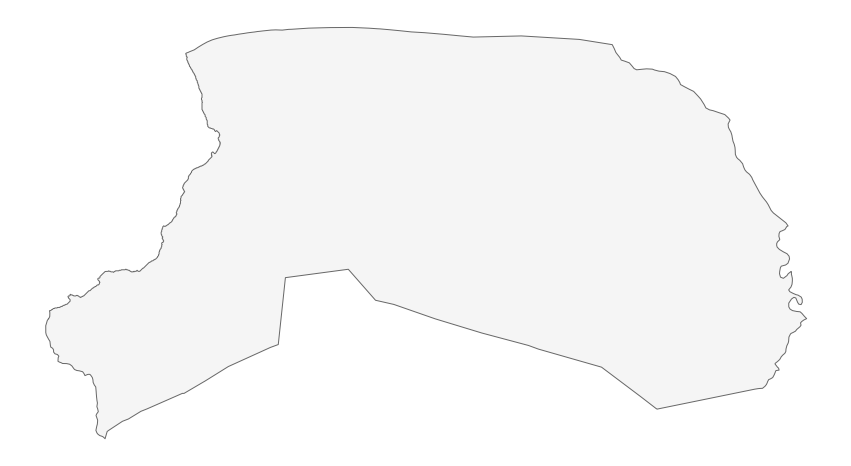

In [16]:
ax = ph_IC.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off');

In [49]:
conn.commit() 

In [1]:
# # Create connection to database with psycopg2 module (update params according your db)
connection = psycopg2.connect(host='127.0.0.1', port=5432, dbname='cyvorgz', user='cyvorgz')

# # Cursor is needed when you need to insert or make changes to the database (i.e. creating a table, index, etc)
cursor = connection.cursor()

# # Specify sql query
sql = "SELECT * FROM LINES"

# # replace this value with the column name of the geometry of your table
# geometry_col_name = 'way'

# # Read data from PostGIS 
# # specify the geom_col parameter if the geometry column is not called 'geom' in your table
ls = gpd.read_postgis(sql=sql, con=connection, geom_col='wkb_geometry', crs=4326)

NameError: name 'psycopg2' is not defined

In [63]:
ls.head(3)

,ogc_fid,osm_id,name,highway,waterway,aerialway,barrier,man_made,z_order,other_tags,wkb_geometry
0,1,267,Maharlika,tertiary,None,None,None,None,4,"""lanes""=>""2"",""oneway""=>""yes""","LINESTRING (121.0520395 14.6502922, 121.053566..."
1,2,3049,Chico River,None,river,None,None,None,0,None,"LINESTRING (120.9440392 17.0717997, 120.944253..."
2,3,2508359,Sagada Mission Compound,footway,None,None,None,None,0,None,"LINESTRING (120.9019697 17.0809031, 120.901964..."


In [64]:
ph_IC

,Province,City,geometry
793,Lanao del Norte,Iligan City,"POLYGON ((124.49559784 8.13796997, 124.4662017..."


In [65]:
ph_IC.loc[:, 'geometry'] = ph_IC['geometry'].simplify(0.001, preserve_topology=True) # ST_SimplifyPreserveTopology

In [22]:
# folium.GeoJson(ph_IC[['Province', 'City', 'geometry']]).add_to(m)

In [23]:
m.save('test.html')

In [66]:
ls['geometry'] = ls['wkb_geometry']

In [67]:
ls.head(3)

,ogc_fid,osm_id,name,highway,waterway,aerialway,barrier,man_made,z_order,other_tags,wkb_geometry,geometry
0,1,267,Maharlika,tertiary,None,None,None,None,4,"""lanes""=>""2"",""oneway""=>""yes""","LINESTRING (121.0520395 14.6502922, 121.053566...","LINESTRING (121.0520395 14.6502922, 121.053566..."
1,2,3049,Chico River,None,river,None,None,None,0,None,"LINESTRING (120.9440392 17.0717997, 120.944253...","LINESTRING (120.9440392 17.0717997, 120.944253..."
2,3,2508359,Sagada Mission Compound,footway,None,None,None,None,0,None,"LINESTRING (120.9019697 17.0809031, 120.901964...","LINESTRING (120.9019697 17.0809031, 120.901964..."


In [26]:
ls['geometry'] = ls['wkb_geometry']

In [27]:
ls.columns

Index(['ogc_fid', 'osm_id', 'name', 'highway', 'waterway', 'aerialway',
       'barrier', 'man_made', 'z_order', 'other_tags', 'wkb_geometry',
       'geometry'],
      dtype='object')

In [28]:
ic_streets = gpd.sjoin(ls,ph_IC, op='within',)

/home/shehab/anaconda3/envs/gsa3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [29]:
ic_streets

,ogc_fid,osm_id,name,highway,waterway,aerialway,barrier,man_made,z_order,other_tags,wkb_geometry,geometry,index_right,Province,City
22864,22835,28085232,Iligan-Misamis Oriental,None,None,None,None,None,0,"""admin_level""=>""3"",""boundary""=>""administrative""","LINESTRING (124.2465589 8.3229966, 124.2593193...","LINESTRING (124.2465589 8.3229966, 124.2593193...",793,Lanao del Norte,Iligan City
35433,35429,30288546,Tino Badelles,tertiary,None,None,None,None,4,"""oneway""=>""no""","LINESTRING (124.2375505 8.227547899999999, 124...","LINESTRING (124.2375505 8.227547899999999, 124...",793,Lanao del Norte,Iligan City
35451,35449,30308869,Macapagal Road,trunk,None,None,None,None,8,"""ref""=>""9"",""oneway""=>""yes"",""source:ref""=>""dpwh""","LINESTRING (124.2061649 8.2042865, 124.2059826...","LINESTRING (124.2061649 8.2042865, 124.2059826...",793,Lanao del Norte,Iligan City
35467,35455,30327907,None,residential,None,None,None,None,3,None,"LINESTRING (124.2437411 8.2079252, 124.2440465...","LINESTRING (124.2437411 8.2079252, 124.2440465...",793,Lanao del Norte,Iligan City
35468,35456,30327908,Roxas Avenue,trunk,None,None,None,None,8,"""lanes""=>""2"",""maxspeed""=>""20"",""ref""=>""9"",""sour...","LINESTRING (124.2412702 8.221997999999999, 124...","LINESTRING (124.2412702 8.221997999999999, 124...",793,Lanao del Norte,Iligan City
35469,35457,30327909,None,tertiary,None,None,None,None,4,None,"LINESTRING (124.2440215 8.2378778, 124.244834 ...","LINESTRING (124.2440215 8.2378778, 124.244834 ...",793,Lanao del Norte,Iligan City
85841,85878,88789990,None,trunk,None,None,None,None,8,"""oneway""=>""yes""","LINESTRING (124.200679 8.2025483, 124.2009039 ...","LINESTRING (124.200679 8.2025483, 124.2009039 ...",793,Lanao del Norte,Iligan City
85903,85876,88789978,Suarez Road,tertiary,None,None,None,None,4,"""foot""=>""yes"",""lanes""=>""2"",""bicycle""=>""yes"",""s...","LINESTRING (124.2089263 8.2054613, 124.210523 ...","LINESTRING (124.2089263 8.2054613, 124.210523 ...",793,Lanao del Norte,Iligan City
85904,85877,88789985,None,trunk,None,None,None,None,8,"""ref""=>""9"",""oneway""=>""yes"",""source:ref""=>""dpwh""","LINESTRING (124.1995141 8.202102399999999, 124...","LINESTRING (124.1995141 8.202102399999999, 124...",793,Lanao del Norte,Iligan City
85906,85880,88790003,Bro Raymund Jeffrey Road,secondary,None,None,None,None,6,None,"LINESTRING (124.2412702 8.221997999999999, 124...","LINESTRING (124.2412702 8.221997999999999, 124...",793,Lanao del Norte,Iligan City


In [30]:
ic_streets.columns

Index(['ogc_fid', 'osm_id', 'name', 'highway', 'waterway', 'aerialway',
       'barrier', 'man_made', 'z_order', 'other_tags', 'wkb_geometry',
       'geometry', 'index_right', 'Province', 'City'],
      dtype='object')

In [54]:
ic_streets[['name','geometry']].head(3)

,name,geometry
22864,Iligan-Misamis Oriental,"LINESTRING (124.2465589 8.3229966, 124.2593193..."
35433,Tino Badelles,"LINESTRING (124.2375505 8.227547899999999, 124..."
35451,Macapagal Road,"LINESTRING (124.2061649 8.2042865, 124.2059826..."


In [32]:
import numpy as np
ic_streets['car_density'] = np.random.randint(0,50,  ic_streets.shape[0])

In [33]:
ic_streets = ic_streets[['name','geometry','car_density']]

In [53]:
ic_streets.head(3)

,name,geometry,car_density
22864,Iligan-Misamis Oriental,"LINESTRING (124.2465589 8.3229966, 124.2593193...",22
35433,Tino Badelles,"LINESTRING (124.2375505 8.227547899999999, 124...",13
35451,Macapagal Road,"LINESTRING (124.2061649 8.2042865, 124.2059826...",42


In [55]:
from branca.colormap import LinearColormap

In [56]:
 ic_gdf = ic_streets[['name','geometry','car_density']]

In [57]:
colorscale = LinearColormap(['#33f284', '#000000'], vmin=ic_gdf['car_density'].min(), vmax=ic_gdf['car_density'].max())
colorscale

In [38]:
ic_gdf?

In [58]:
crs = {'init': 'epsg:4326'}

# Create the GeoDataFrame from the DataFrame
ic_gdf = gpd.GeoDataFrame(ic_gdf, crs=crs, geometry='geometry')
ic_gdf.head()

,name,geometry,car_density
22864,Iligan-Misamis Oriental,"LINESTRING (124.2465589 8.3229966, 124.2593193...",22
35433,Tino Badelles,"LINESTRING (124.2375505 8.227547899999999, 124...",13
35451,Macapagal Road,"LINESTRING (124.2061649 8.2042865, 124.2059826...",42
35467,None,"LINESTRING (124.2437411 8.2079252, 124.2440465...",7
35468,Roxas Avenue,"LINESTRING (124.2412702 8.221997999999999, 124...",20


In [59]:
ic_gdf?

In [61]:
m = folium.Map(location=center, zoom_start=zoom, prefer_canvas=True)

def get_color(feature):
    val = feature['properties']['car_density']
    if not val:
        return '#000000'
    return colorscale(val)
    
folium.GeoJson(
    ic_gdf,
    name = 'Traffic Congestion',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name', 'car_density'],
        aliases=['Street Name',  'car_density']
    ),
    style_function = lambda feature: {
        'fillColor': get_color(feature),
        'color': get_color(feature),
        'weight': 2,

    }
).add_to(m)

m.save('test.html')

In [42]:
# folium.GeoJson(
#     adm[['name_1', 'name_2', 'pop_dens', 'geometry']],
#     name='Population Density',
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['name_1', 'name_2', 'pop_dens'],
#         aliases=['Province', 'City/Municipality', 'Population Density']
#     )

In [43]:
# 09351354905